# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import missing
from eagles.Exploratory import distributions

import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data.

In [3]:
wines = wines.mask(np.random.random(wines.shape) < .1)

## Missing Data

In [4]:
missing.get_proportion_missing(df=wines, cols=[])

                                               column_name  percent_missing
malic_acid                                      malic_acid        11.797753
alcalinity_of_ash                        alcalinity_of_ash        11.797753
proanthocyanins                            proanthocyanins        11.797753
nonflavanoid_phenols                  nonflavanoid_phenols        10.674157
alcohol                                            alcohol        10.112360
magnesium                                        magnesium         9.550562
color_intensity                            color_intensity         9.550562
ash                                                    ash         8.988764
OD280_OD315_of_diluted_wines  OD280_OD315_of_diluted_wines         8.988764
flavanoids                                      flavanoids         8.426966
total_phenols                                total_phenols         7.865169
proline                                            proline         6.741573
hue         

If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True

                                               column_name  percent_missing
malic_acid                                      malic_acid        11.797753
alcalinity_of_ash                        alcalinity_of_ash        11.797753
proanthocyanins                            proanthocyanins        11.797753
nonflavanoid_phenols                  nonflavanoid_phenols        10.674157
alcohol                                            alcohol        10.112360
magnesium                                        magnesium         9.550562
color_intensity                            color_intensity         9.550562
ash                                                    ash         8.988764
OD280_OD315_of_diluted_wines  OD280_OD315_of_diluted_wines         8.988764
flavanoids                                      flavanoids         8.426966
total_phenols                                total_phenols         7.865169
proline                                            proline         6.741573
hue         

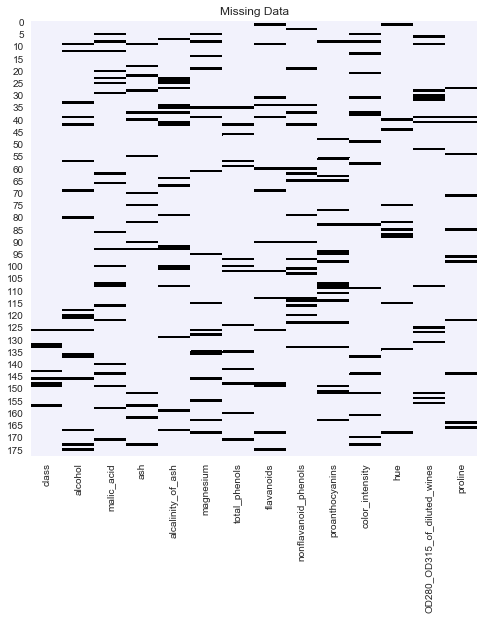

In [5]:
missing.get_proportion_missing(df=wines, cols=[], plot=True)

## Looking at Distributions and Potential Caps

,Feature,75th_Percentile,90th_Percentile,2_SD,3_SD
0,alcohol,13.6325,14.102,14.618747,15.426652
1,proline,985.0000,1262.500,1383.677848,1701.625206


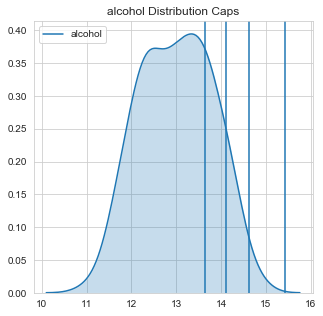

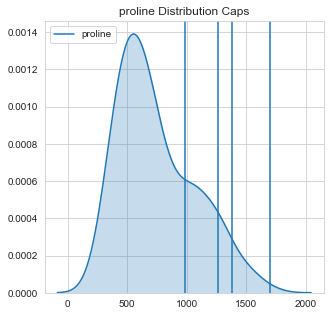

In [6]:
distributions.find_caps(df=wines, cols=['alcohol', 'proline'], plot=True)